In [13]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
import csv

# sklearn imports robust models and maybe losses (not asked in assignment)

In [14]:
def load_dataset_csv(data_path):
    """Reads from a csv file assuming two columns (2D) representing X and y
    of a regression problem."""
    with open(data_path, newline='') as f:
        csv_reader = csv.reader(f)    

        next(csv_reader)

        X = []
        y = []

        for row in csv_reader:
            X.append(row[0])
            y.append(row[1])
        
    X = np.array(X, dtype=float)
    y = np.array(y, dtype=float)

    return X, y

In [15]:
def plot_predictions(X, ax, label, model, n=None):
    """
    This function plots X and y predictions of a model in the range indicated by
    X and y (X must be 1-D) of a given linear scikit learn model. The X values
    for plotting the model predictions are extended to polynomial features if n is given.
    The X values for plotting the model predictions are extended to polynomial features of 
    degree n in descending order (x^n, x^(n-1), ...)
    This function does not create a figure but takes a matplotlib Axes object
    for plotting. Therefore it can be used several times to plot on one Axes.
    """

    X_plot = np.linspace(np.min(X), np.max(X), 100).reshape(-1, 1)
    if n:
        X_poly_plot = np.vander(X_plot[:, 0], N=n+1)
        y_plot = model.predict(X_poly_plot)
    else:
        y_plot = model.predict(X_plot)

    ax.plot(
        X_plot[:, 0],
        y_plot,
        linewidth=2,
        label=label,
    )

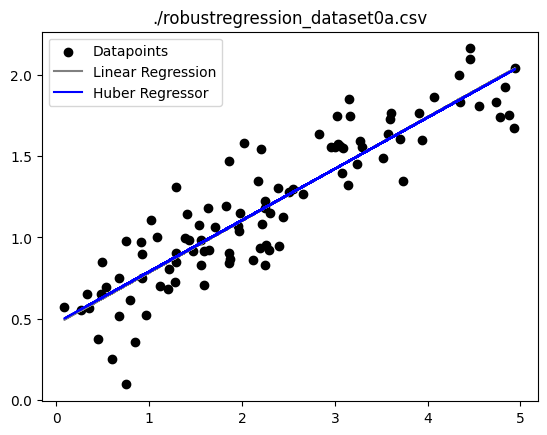

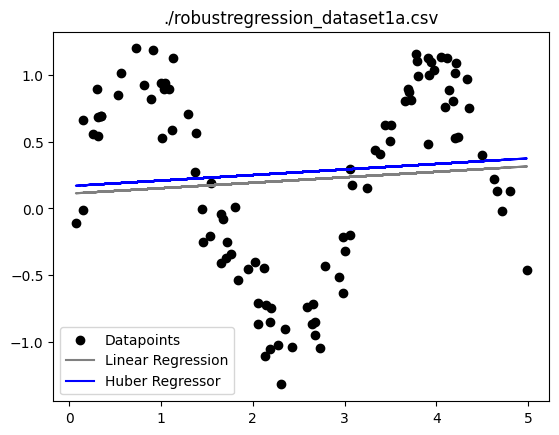

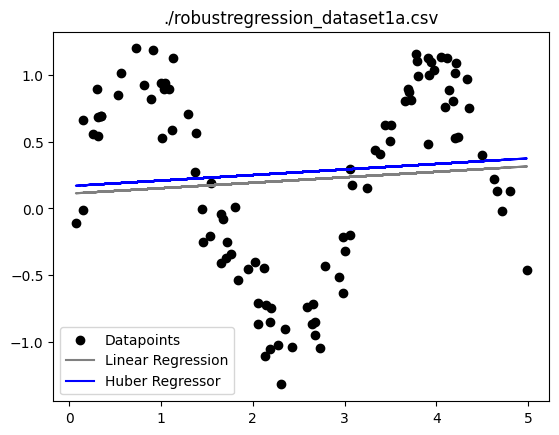

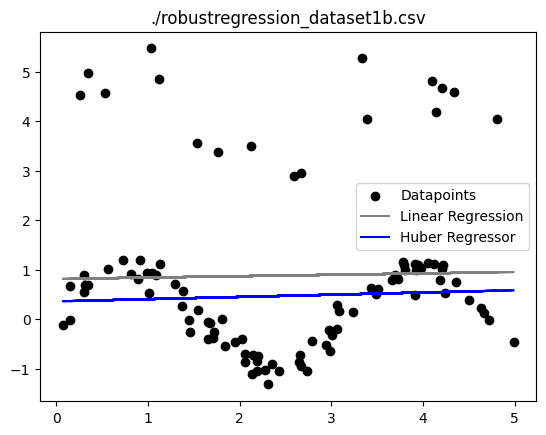

In [30]:
# For each dataset:
    # Plot data
    # Train robust regressors
    # Plot best model fit
    # Compare models
    
for dataset in ['./robustregression_dataset0a.csv', './robustregression_dataset1a.csv', './robustregression_dataset1a.csv', './robustregression_dataset1b.csv']:
    x, y = load_dataset_csv(dataset)
    plt.figure()
    plt.scatter(x, y, label="Datapoints", color="black")
    plt.title(dataset)
    
    # Linear
    model = LinearRegression()
    x_2d = x.reshape(-1, 1)
    model.fit(x_2d, y)
    y_predictions = model.predict(x_2d)
    
    plt.plot(x, y_predictions, label="Linear Regression", color="grey")

    # Huber
    model = HuberRegressor()
    x_2d = x.reshape(-1, 1)
    model.fit(x_2d, y)
    y_predictions = model.predict(x_2d)
    
    plt.plot(x, y_predictions, label="Huber Regressor", color="blue")

    plt.legend()
    